In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import math
import os
from scipy.stats import lognorm

from utils import QRvsIAC_10vs50_1997paper, QRvsIAC_10vs50
base_path = "/Data/gautt/bundle_adjustment/autocalibration_project/results"


A Comparison of QR vs IAC to recover K depending on translation and normalizing mathod: average for each focal length


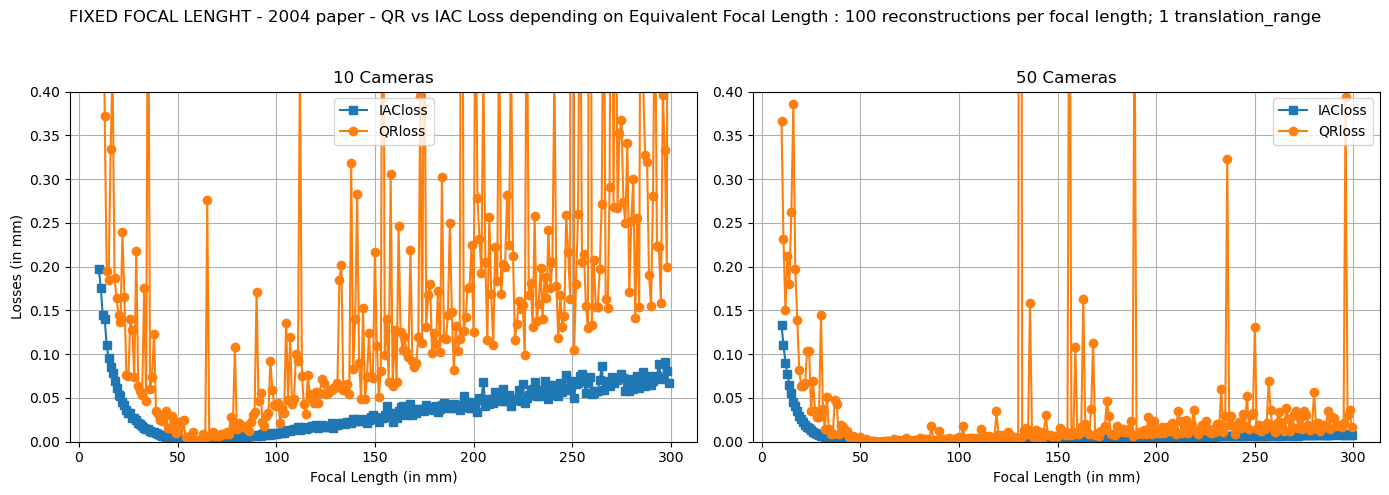

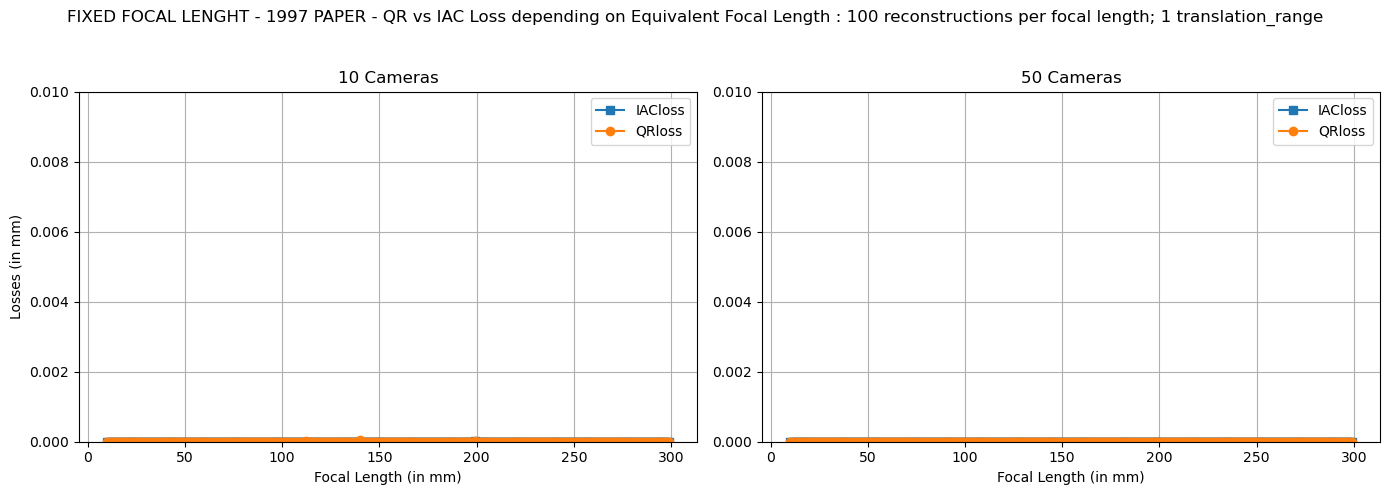

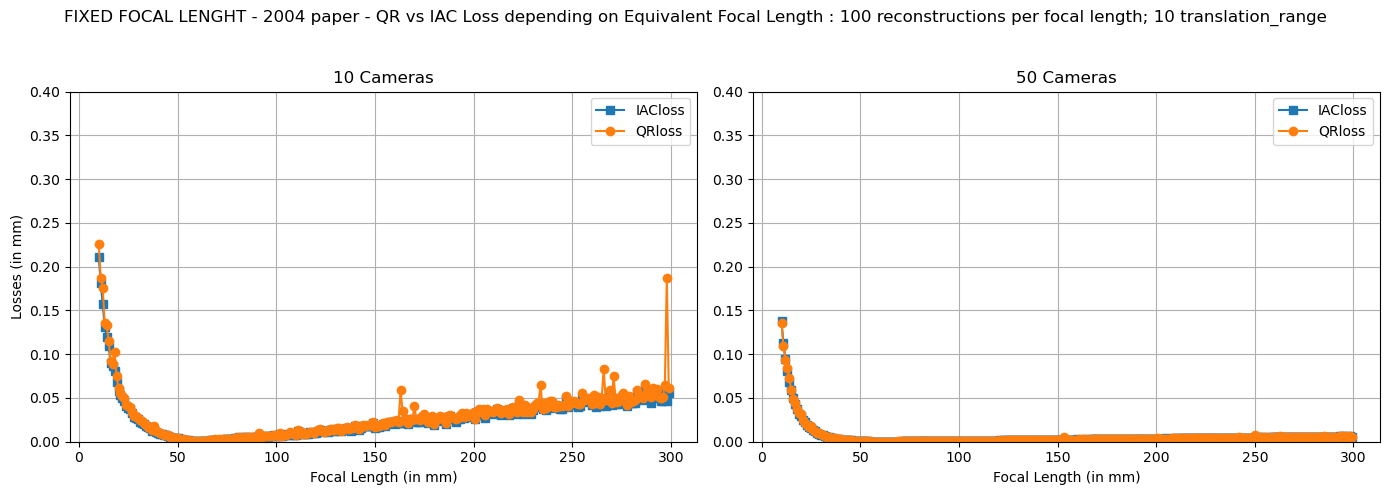

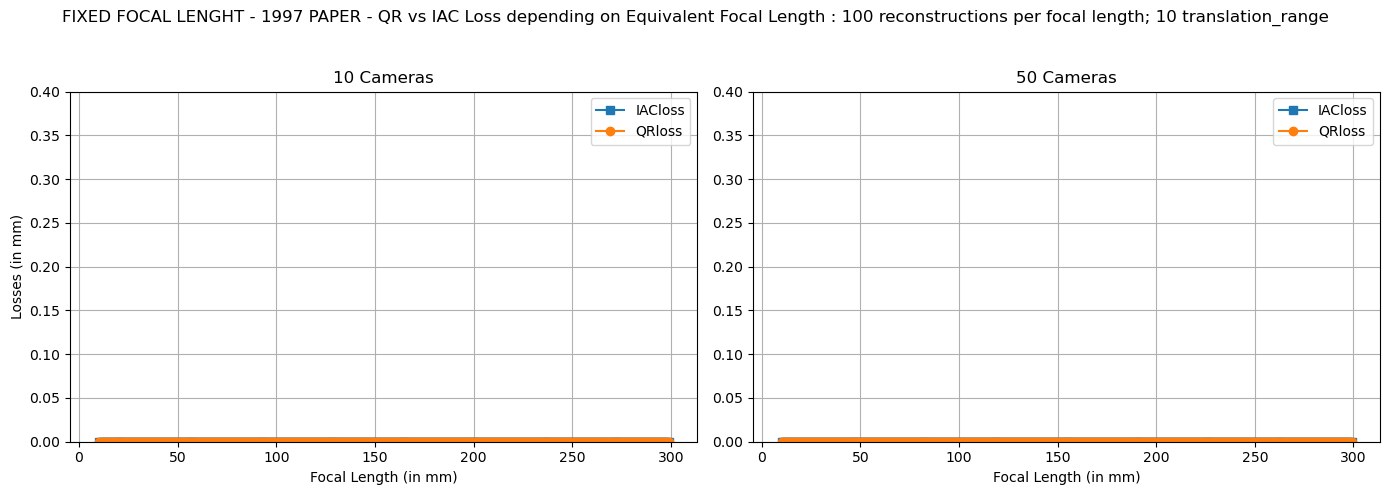

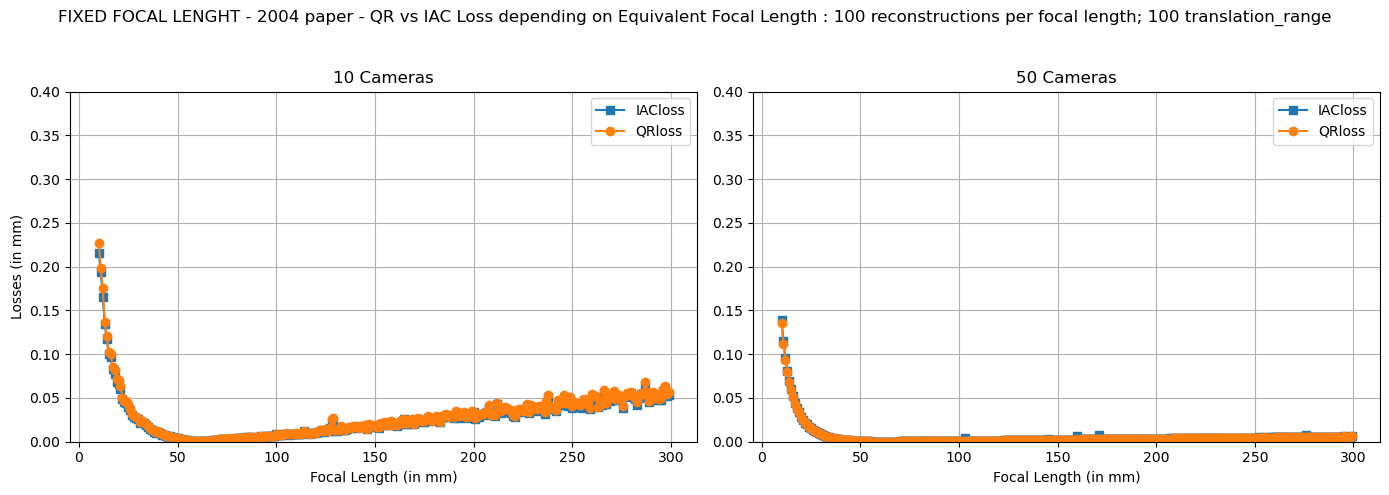

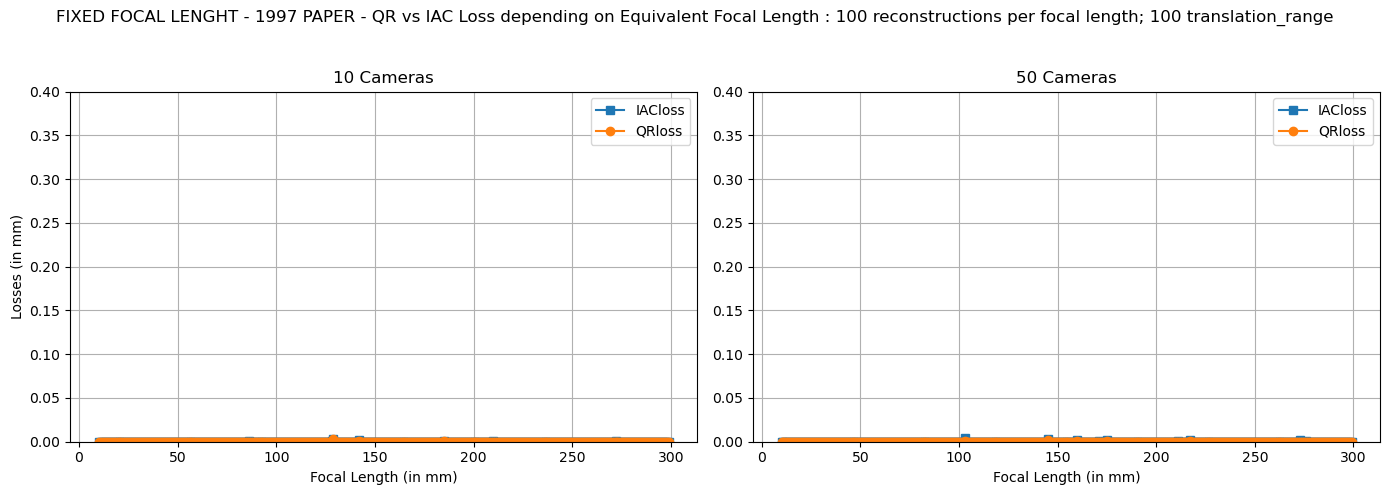

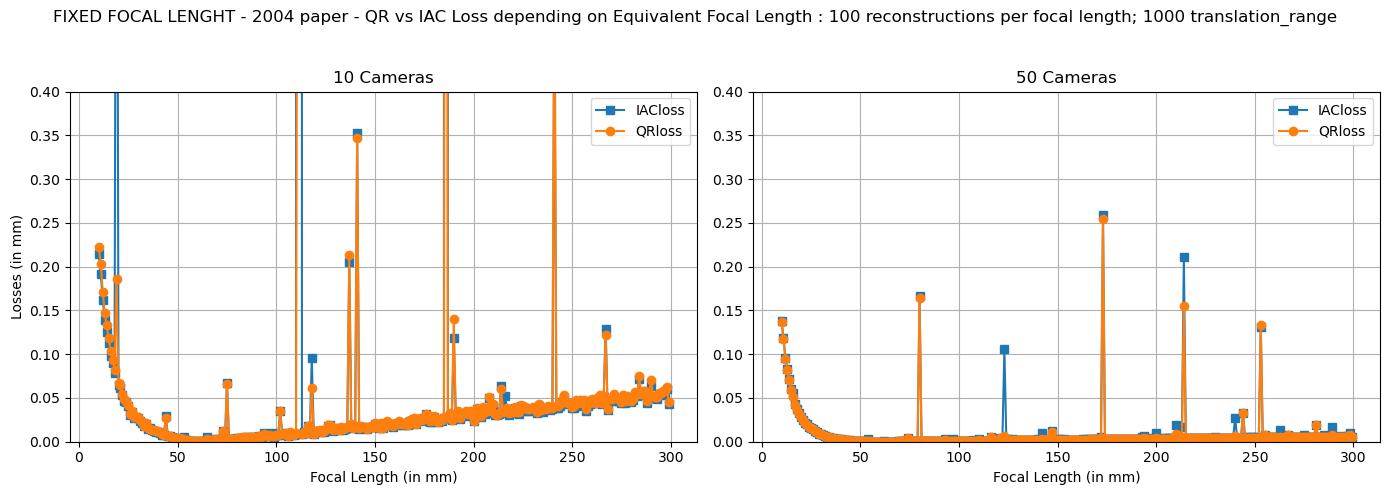

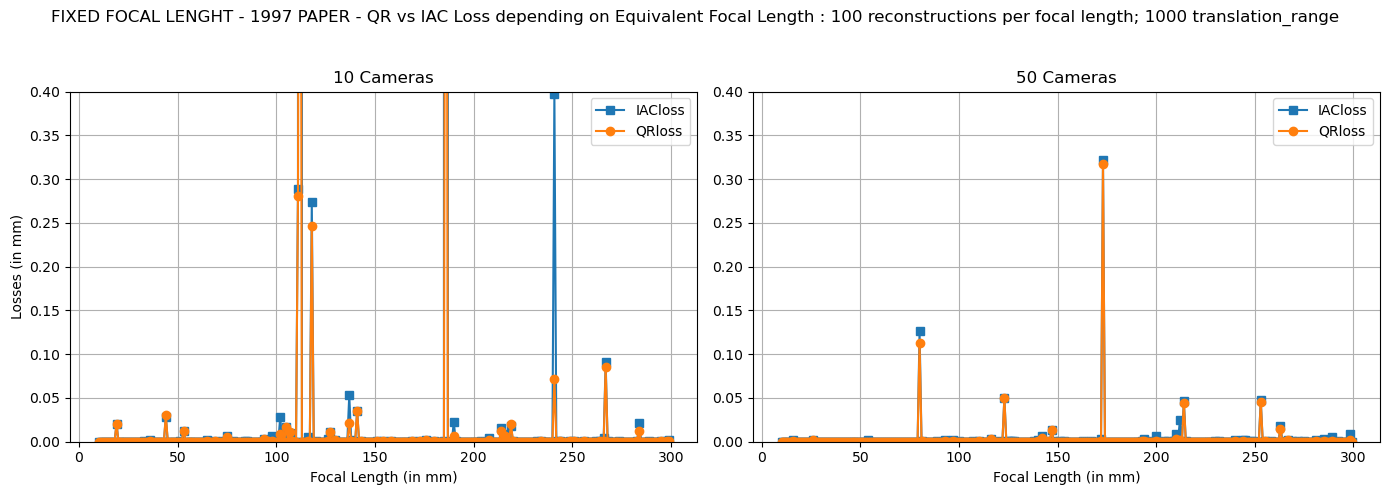

In [2]:
ylim = 0.4

# print("A Comparison of QR vs IAC to recover K depending on translation: single trial per focal length")

print("A Comparison of QR vs IAC to recover K depending on translation and normalizing mathod: average for each focal length")
QRvsIAC_10vs50(num_reconstructions = 100, translation_range = 1, ylim = ylim)
QRvsIAC_10vs50_1997paper(num_reconstructions = 100, translation_range = 1, ylim = 0.01)


QRvsIAC_10vs50(num_reconstructions = 100, translation_range = 10, ylim = ylim)
QRvsIAC_10vs50_1997paper(num_reconstructions = 100, translation_range = 10, ylim = ylim)

QRvsIAC_10vs50(num_reconstructions = 100, translation_range = 100, ylim = ylim)
QRvsIAC_10vs50_1997paper(num_reconstructions = 100, translation_range = 100, ylim = ylim)

QRvsIAC_10vs50(num_reconstructions = 100, translation_range = 1000, ylim = ylim)
QRvsIAC_10vs50_1997paper(num_reconstructions = 100, translation_range = 1000, ylim = ylim)

# QRvsIAC_10vs50(num_reconstructions = 100, translation_range = 10000, ylim = ylim)
# QRvsIAC_10vs50_1997paper(num_reconstructions = 100, translation_range = 10000, ylim = ylim)


In [3]:
def RecoverK_DetailedError(num_cams : int, num_reconstructions : int, translation_range : float, ylim = None, xlim = None):
    path = f'RecoverK&R_detailed_{num_cams}Cams_{num_reconstructions}Reconstr_{translation_range}Transl.txt'
    full_path = os.path.join(base_path, path)
    df = pd.read_csv(full_path, sep=r'\s+')

    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)
    axes = axes.flatten()

    normalization_for_pp = math.sqrt(24**2 + 36**2)
    normalization_for_K = np.sqrt(normalization_for_pp ** 2 + 1 + 2 * df['FocalLength'] ** 2)


    axes[0].plot(df['FocalLength'], df['QR_Kcost'], label='Total K distance')
    axes[0].plot(df['FocalLength'], df['QR_Focalcost'], label='Focal distance')
    axes[0].plot(df['FocalLength'], df['QR_PPcost'], label='Principal point distance')
    axes[0].plot(df['FocalLength'], df['QR_Skewcost'], label='Skew distance')
    axes[0].plot(df['FocalLength'], df['QR_RRtcost'], label='RRt cost')

    axes[0].legend()
    axes[0].set_xlabel('Focal Length (in mm)')
    axes[0].set_ylabel('Distance Loss (in mm)')
    axes[0].set_title(f'L2 error of reconstructing K with QR')

    axes[1].plot(df['FocalLength'], df['IAC_Kcost'], label='Total K distance')
    axes[1].plot(df['FocalLength'], df['IAC_Focalcost'], label='Focal distance')
    axes[1].plot(df['FocalLength'], df['IAC_PPcost'], label='Principal point distance')
    axes[1].plot(df['FocalLength'], df['IAC_Skewcost'], label='Skew distance')

    axes[1].legend()
    axes[1].set_xlabel('Focal Length (in mm)')
    axes[1].set_ylabel('Distance Loss (in mm)')
    axes[1].set_title(f'L2 error of reconstructing K with IAC')

    axes[2].plot(df['FocalLength'], df['QR_Kcost'] / normalization_for_K, label='Total K distance')
    axes[2].plot(df['FocalLength'], df['QR_Focalcost'] / df['FocalLength'], label='Focal distance')
    axes[2].plot(df['FocalLength'], df['QR_PPcost'] / normalization_for_pp, label='Principal point distance')
    axes[2].legend()
    axes[2].set_xlabel('Focal Length (in mm)')
    axes[2].set_ylabel('Error (%)')
    axes[2].set_title(f'L2 error normalized of reconstructing K with QR')
    axes[2].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    axes[3].plot(df['FocalLength'], df['IAC_Kcost'] / normalization_for_K, label='Total K distance')
    axes[3].plot(df['FocalLength'], df['IAC_Focalcost'] / df['FocalLength'], label='Focal distance')
    axes[3].plot(df['FocalLength'], df['IAC_PPcost'] / normalization_for_pp, label='Principal point distance')
    axes[3].legend()
    axes[3].set_xlabel('Focal Length (in mm)')
    axes[3].set_ylabel('Error (%)')
    axes[3].set_title(f'L2 error normalized of reconstructing K with IAC')
    axes[3].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    if (xlim is not None):
        for ax in axes:
            ax.set_xlim(0, xlim)


    if (ylim is not None):
        axes[0].set_ylim(0, ylim)
        axes[1].set_ylim(0, ylim)

    plt.suptitle(f"FIXED FOCAL LENGTH - Recovery of K from {num_cams} cameras (averaged over {num_reconstructions} trials); translation range: {translation_range}")
    plt.tight_layout()
    plt.show()

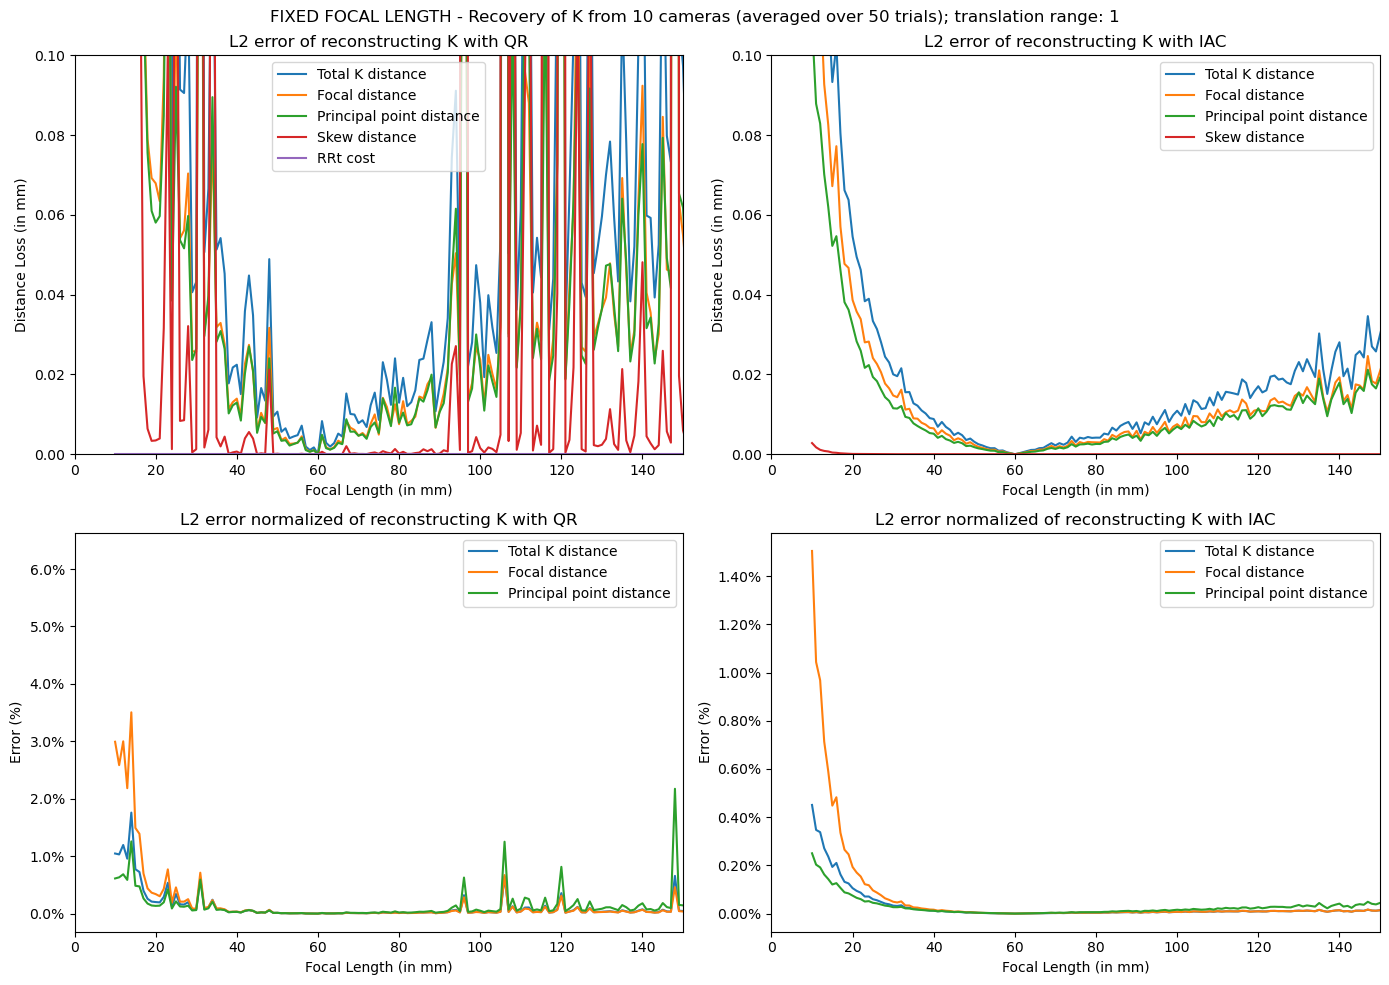

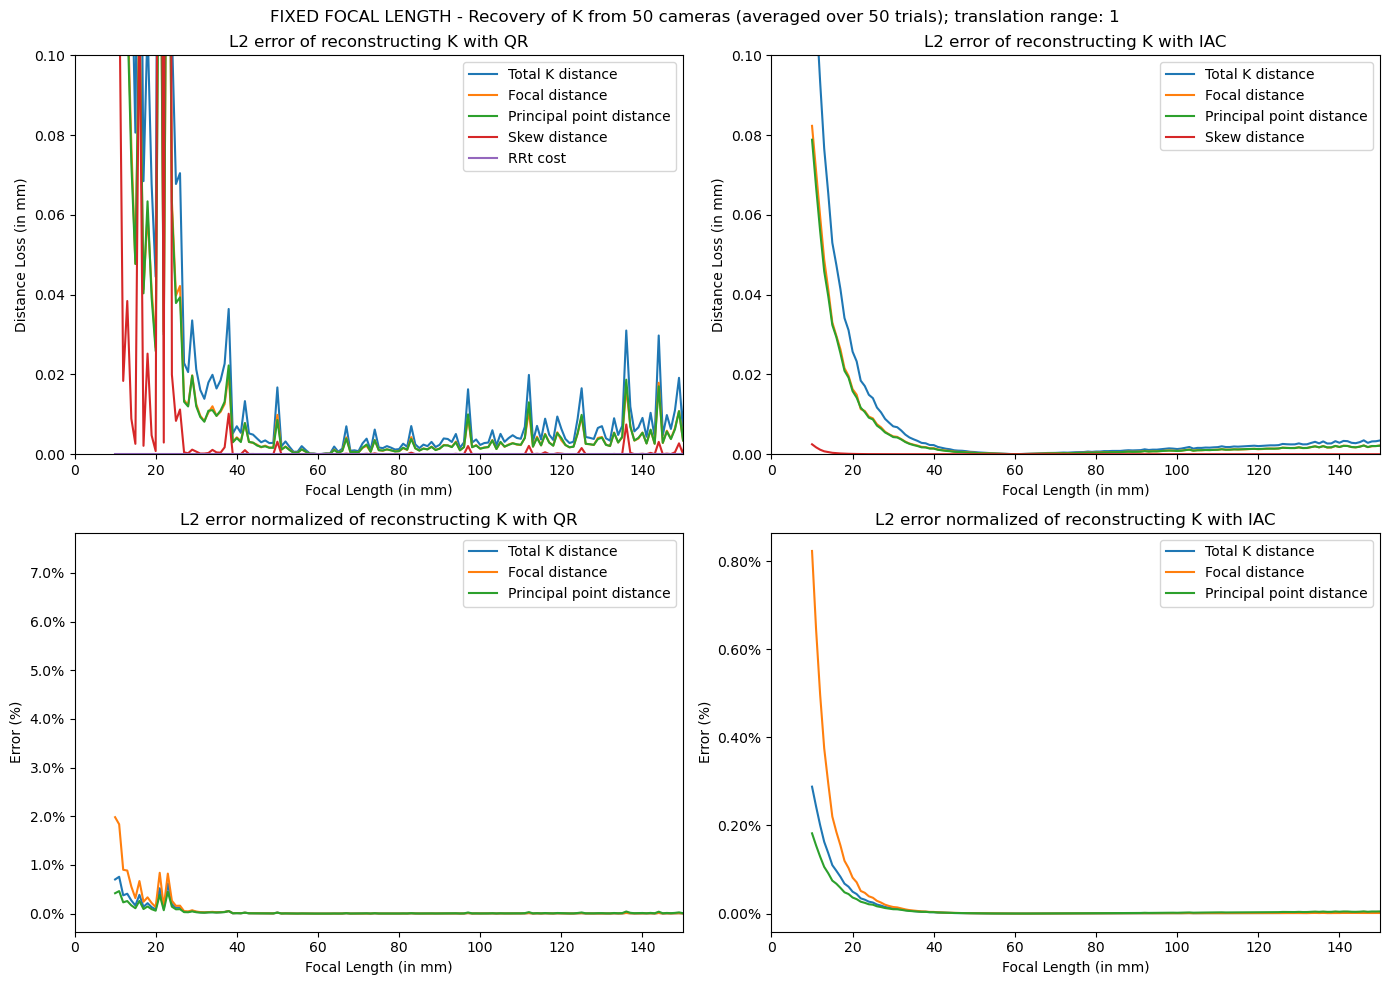

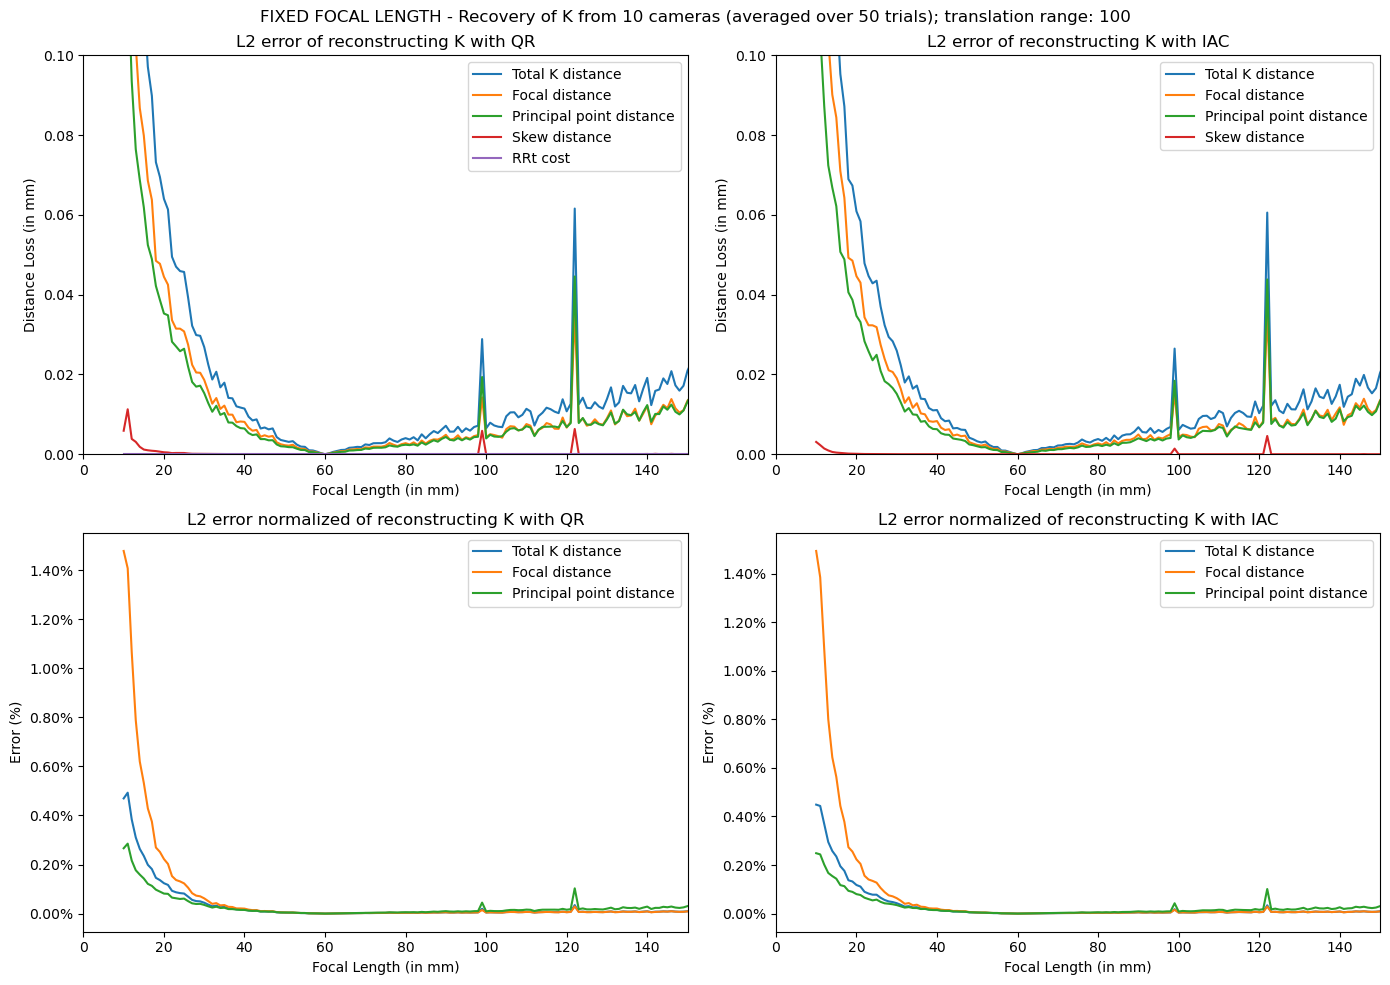

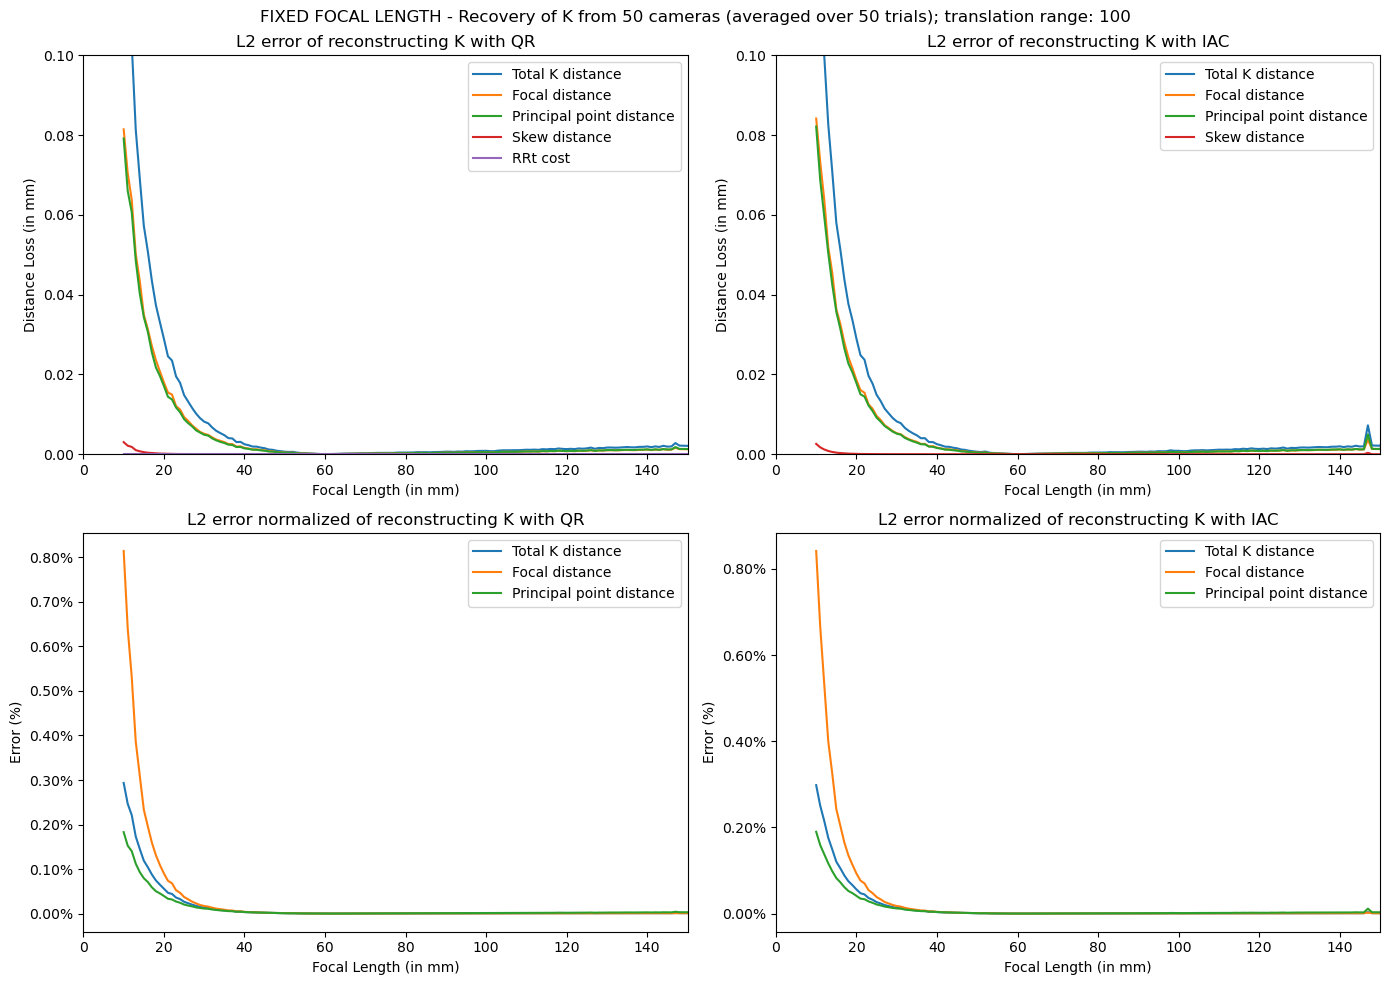

In [4]:
xlim = 150

RecoverK_DetailedError(10, 50, 1, ylim=0.1, xlim=xlim)
RecoverK_DetailedError(50, 50, 1, ylim=0.1, xlim=xlim)
RecoverK_DetailedError(10, 50, 100, ylim=0.1, xlim=xlim)
RecoverK_DetailedError(50, 50, 100, ylim=0.1, xlim=xlim)

In [5]:
def QRvsIAC_10vs50_varying(num_reconstructions, translation_range, mean = 50, stddev = 25, ylim = None):

    # Load both datasets
    file_name_10 = f"RecoverK_varying_detailed_10Cams_{num_reconstructions}Reconstr_{translation_range}Transl_CamDistLogN({mean},{stddev}).txt"
    file_name_50 = f"RecoverK_varying_detailed_50Cams_{num_reconstructions}Reconstr_{translation_range}Transl_CamDistLogN({mean},{stddev}).txt"
    path_10 = os.path.join(base_path, file_name_10)
    path_50 = os.path.join(base_path, file_name_50)
    df_10 = pd.read_csv(path_10, sep=r'\s+')
    df_50 = pd.read_csv(path_50, sep=r'\s+')

    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Plot for 10 cameras
    axes[0].plot(df_10['FocalLength'], df_10['IAC_Kcost'], marker='s', label='IACloss')
    axes[0].plot(df_10['FocalLength'], df_10['QR_Kcost'], marker='o', label='QRloss')
    axes[0].set_title(f'10 Cameras Distributed over LogN({mean}, {stddev})')
    axes[0].set_xlabel('Focal Length (in mm)')
    axes[0].set_ylabel('Losses (in mm)')
    axes[0].legend()
    axes[0].grid(True)

    # Plot for 50 cameras
    axes[1].plot(df_50['FocalLength'], df_50['IAC_Kcost'], marker='s', label='IACloss')
    axes[1].plot(df_50['FocalLength'], df_50['QR_Kcost'], marker='o', label='QRloss')
    axes[1].set_title(f'50 Cameras Distributed over LogN({mean}, {stddev})')
    axes[1].set_xlabel('Focal Length (in mm)')
    axes[1].legend()
    axes[1].grid(True)
    axes[1].tick_params(labelleft=True)  # <--- This line ensures y-axis labels are shown

    # Main title and layout
    fig.suptitle(f'VARYING FOCAL LENGHT - Corrected NORM - QR vs IAC Loss depending on Equivalent Focal Length : {num_reconstructions} total reconstructions; {translation_range}translation_range')
    if (ylim is not None):
        plt.ylim(0,ylim)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

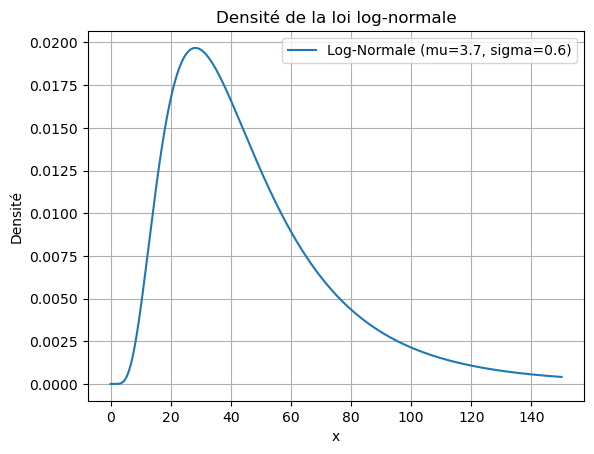

In [6]:
# Paramètres
sigma = 0.6  # écart-type de la loi normale associée
mu = 3.7   # moyenne de la loi normale associée

# Génération des valeurs x (> 0 pour une loi log-normale)
x = np.linspace(0.01, 150, 1000)

# Densité de probabilité
y = lognorm.pdf(x, s=sigma, scale=math.exp(mu))  # scale = exp(mu)

# Tracé
plt.plot(x, y, label=f'Log-Normale (mu={mu}, sigma={sigma})')
plt.title("Densité de la loi log-normale")
plt.xlabel("x")
plt.ylabel("Densité")

plt.grid(True)
plt.legend()
plt.show()

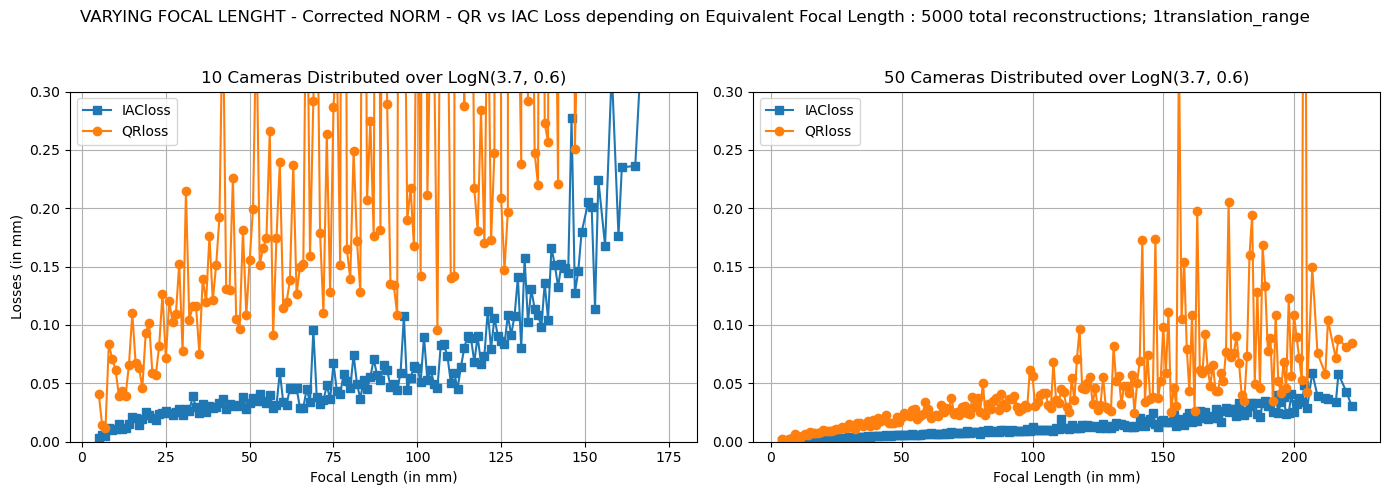

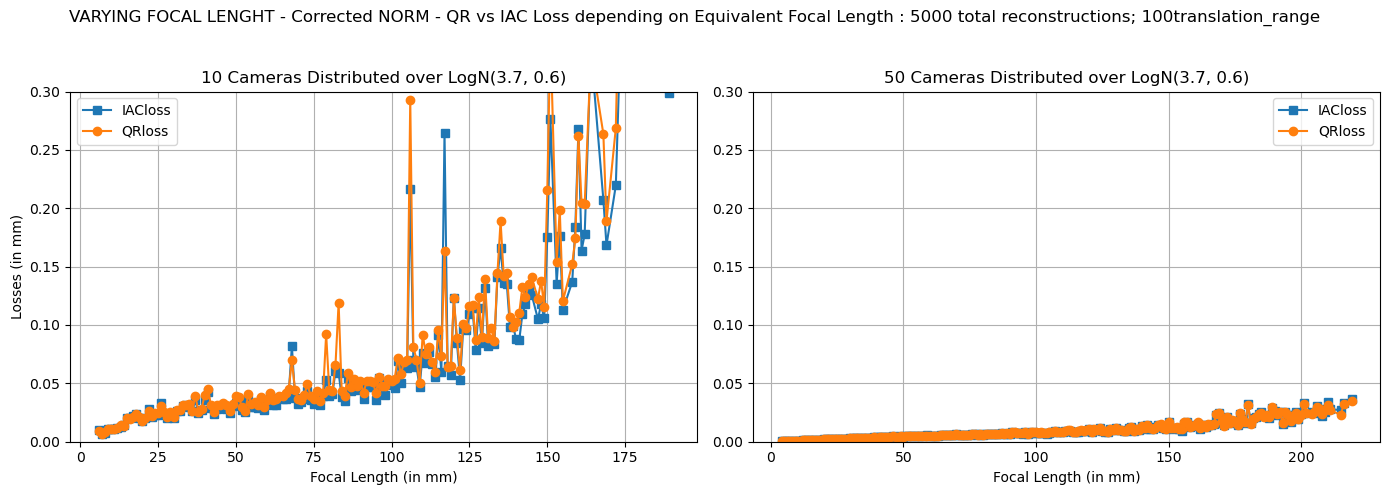

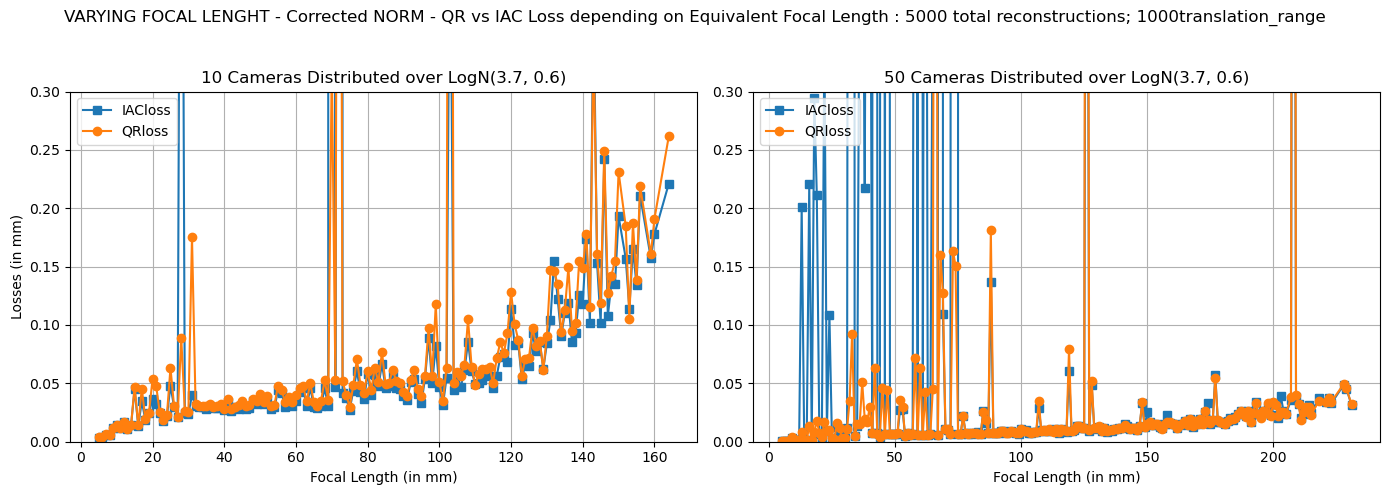

In [7]:
QRvsIAC_10vs50_varying(5000, 1, 3.7, 0.6, ylim = 0.3)
QRvsIAC_10vs50_varying(5000, 100, 3.7, 0.6, ylim = 0.3)
QRvsIAC_10vs50_varying(5000, 1000, 3.7, 0.6, ylim = 0.3)

In [8]:
def RecoverK_varying_DetailedError(num_cams : int, num_reconstructions : int, translation_range : float, mean = 50, stddev = 25, ylim = None):
    path = f'RecoverK_varying_detailed_{num_cams}Cams_{num_reconstructions}Reconstr_{translation_range}Transl_CamDistLogN({mean},{stddev}).txt'
    # path = f'bRecoverK_varying_detailed_{num_cams}Cams_{num_reconstructions}Reconstr_{translation_range}Transl.txt'

    full_path = os.path.join(base_path, path)
    df = pd.read_csv(full_path, sep=r'\s+')

    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)
    axes = axes.flatten()

    normalization_for_pp = math.sqrt(24**2 + 36**2)
    normalization_for_K = np.sqrt(normalization_for_pp ** 2 + 1 + 2 * df['FocalLength'] ** 2)


    axes[0].plot(df['FocalLength'], df['QR_Kcost'], label='Total K distance')
    axes[0].plot(df['FocalLength'], df['QR_Focalcost'], label='Focal distance')
    axes[0].plot(df['FocalLength'], df['QR_PPcost'], label='Principal point distance')
    axes[0].plot(df['FocalLength'], df['QR_Skewcost'], label='Skew distance')

    axes[0].legend()
    axes[0].set_xlabel('Focal Length (in mm)')
    axes[0].set_ylabel('Distance Loss (in mm)')
    axes[0].set_title(f'L2 error of reconstructing K with QR')
    if (ylim is not None):
        axes[0].set_ylim(0, ylim)

    axes[1].plot(df['FocalLength'], df['IAC_Kcost'], label='Total K distance')
    axes[1].plot(df['FocalLength'], df['IAC_Focalcost'], label='Focal distance')
    axes[1].plot(df['FocalLength'], df['IAC_PPcost'], label='Principal point distance')
    axes[1].plot(df['FocalLength'], df['IAC_Skewcost'], label='Skew distance')

    axes[1].legend()
    axes[1].set_xlabel('Focal Length (in mm)')
    axes[1].set_ylabel('Distance Loss (in mm)')
    axes[1].set_title(f'L2 error of reconstructing K with IAC')
    if (ylim is not None):
        axes[1].set_ylim(0, ylim)



    axes[2].plot(df['FocalLength'], df['QR_Kcost'] / normalization_for_K, label='Total K distance')
    axes[2].plot(df['FocalLength'], df['QR_Focalcost'] / df['FocalLength'], label='Focal distance')
    axes[2].plot(df['FocalLength'], df['QR_PPcost'] / normalization_for_pp, label='Principal point distance')
    axes[2].legend()
    axes[2].set_xlabel('Focal Length (in mm)')
    axes[2].set_ylabel('Error (%)')
    axes[2].set_title(f'L2 error normalized of reconstructing K with QR')
    axes[2].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    axes[3].plot(df['FocalLength'], df['IAC_Kcost'] / normalization_for_K, label='Total K distance')
    axes[3].plot(df['FocalLength'], df['IAC_Focalcost'] / df['FocalLength'], label='Focal distance')
    axes[3].plot(df['FocalLength'], df['IAC_PPcost'] / normalization_for_pp, label='Principal point distance')
    axes[3].legend()
    axes[3].set_xlabel('Focal Length (in mm)')
    axes[3].set_ylabel('Error (%)')
    axes[3].set_title(f'L2 error normalized of reconstructing K with IAC')
    axes[3].yaxis.set_major_formatter(PercentFormatter(xmax=1))

    plt.suptitle(f"VARYING FOCAL LENGTH - Recovery of K from {num_cams} cameras (averaged over {num_reconstructions} trials); translation range: {translation_range}")
    plt.tight_layout()
    plt.show()

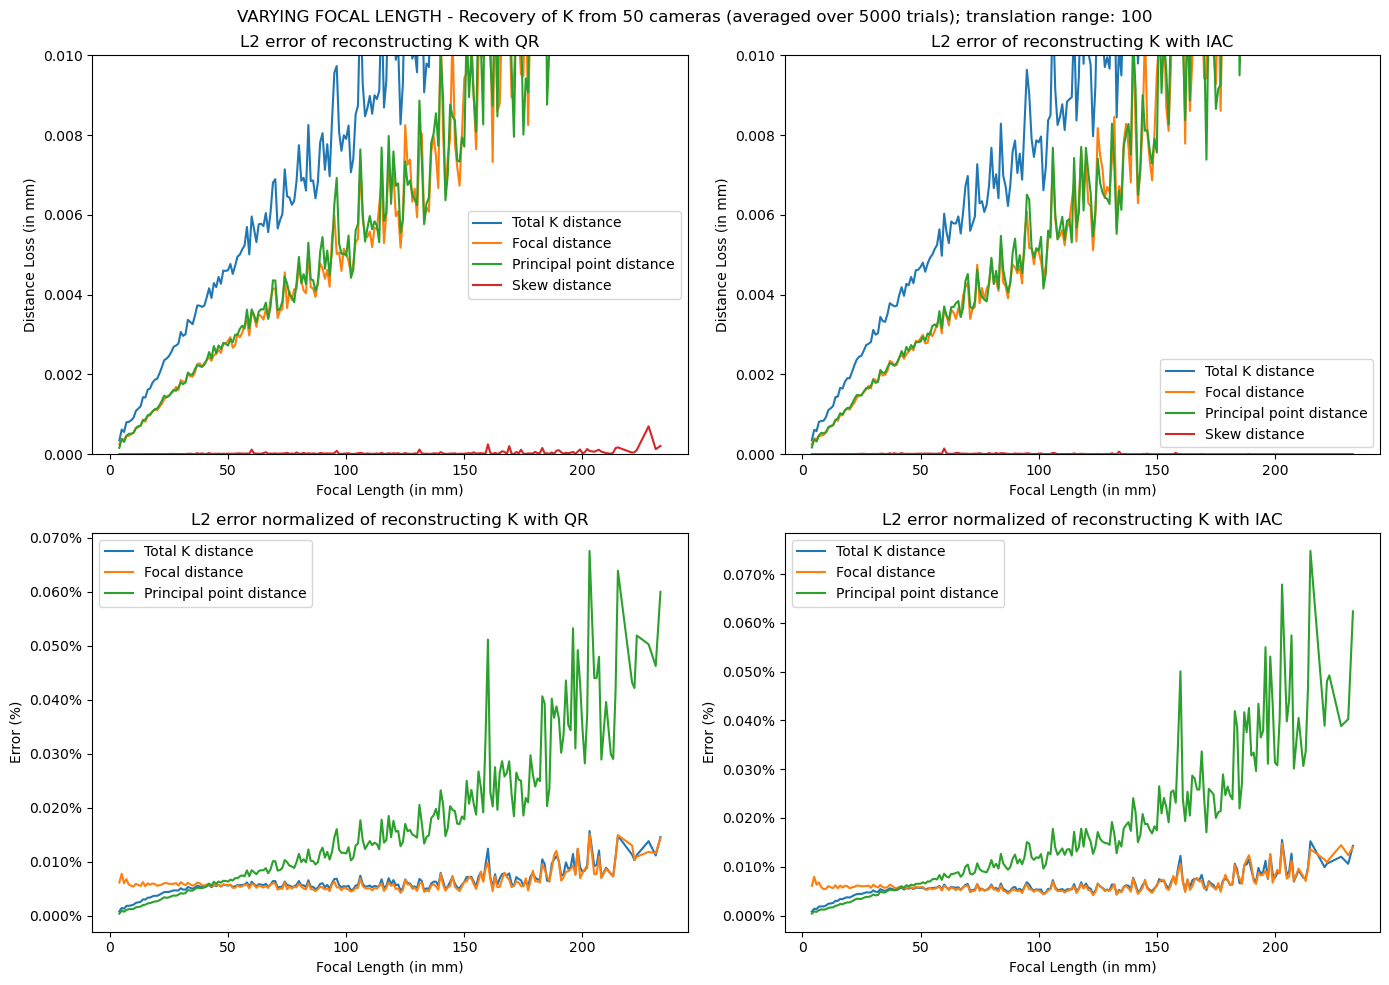

In [23]:
# RecoverK_varying_DetailedError(10, 5000, 1, 3.7, 0.6, ylim = 1)
# RecoverK_varying_DetailedError(10, 5000, 100, 3.7, 0.6, ylim = 0.1)
# RecoverK_varying_DetailedError(50, 5000, 1, 3.7, 0.6, ylim = 1)
RecoverK_varying_DetailedError(50, 5000, 100, 3.7, 0.6, ylim = 0.01)

In [10]:
def RRt_Error(num_cams : int, num_reconstructions : int, translation_range : float, ylim = None):
    path = f'RecoverK&R_detailed_{num_cams}Cams_{num_reconstructions}Reconstr_{translation_range}Transl.txt'
    full_path = os.path.join(base_path, path)
    df = pd.read_csv(full_path, sep=r'\s+')

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

    normalization_for_pp = math.sqrt(24**2 + 36**2)
    normalization_for_K = np.sqrt(normalization_for_pp ** 2 + 1 + 2 * df['FocalLength'] ** 2)

    axes[0].plot(df['FocalLength'], df['QR_RRtcost'], label='RRt cost')
    axes[0].set_xlabel('Focal Length (in mm)')
    axes[0].set_ylabel('RRt proportionality cost')
    axes[0].set_title(f'Recovering R with QR')
    if (ylim is not None):
        axes[0].set_ylim(0, ylim)

    axes[1].plot(df['FocalLength'], df['IAC_RRtcost'], label='RRt cost')
    axes[1].set_xlabel('Focal Length (in mm)')
    axes[1].set_ylabel('RRt proportionality cost')
    axes[1].set_title(f'Recovering R with IAC')
    if (ylim is not None):
        axes[1].set_ylim(0, ylim)

    plt.suptitle(f"FIXED FOCAL LENGTH - Recovery of R from {num_cams} cameras (averaged over {num_reconstructions} trials); translation range: {translation_range}")
    plt.tight_layout()
    plt.show()

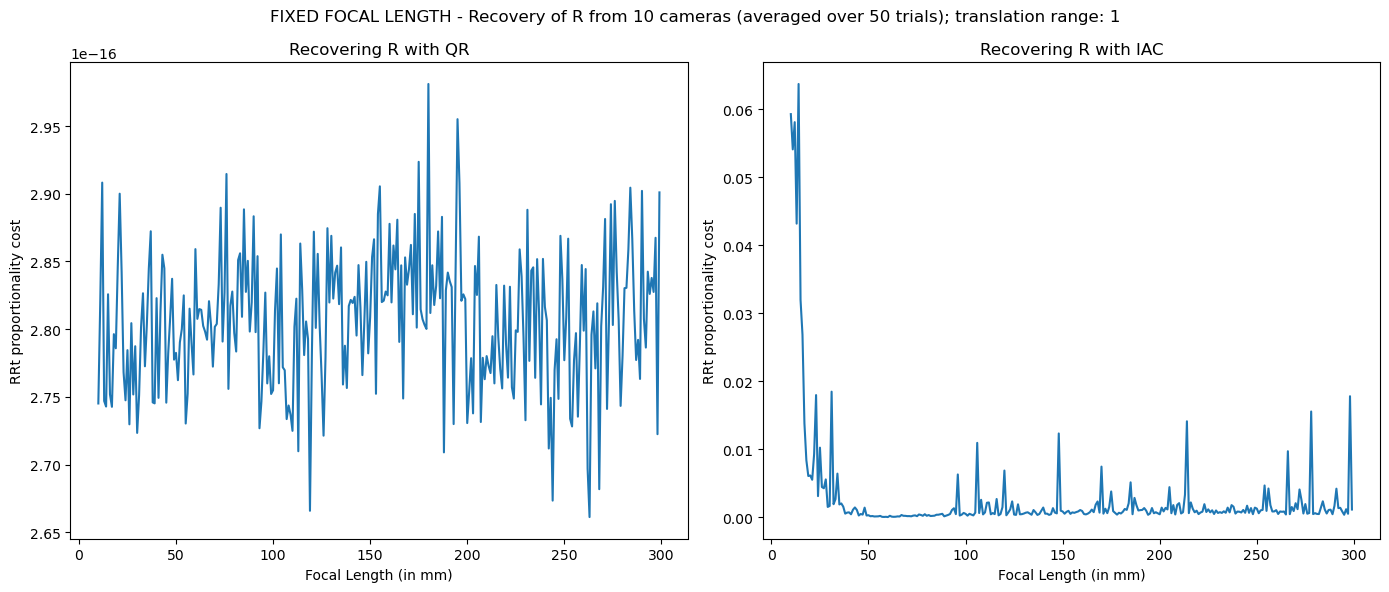

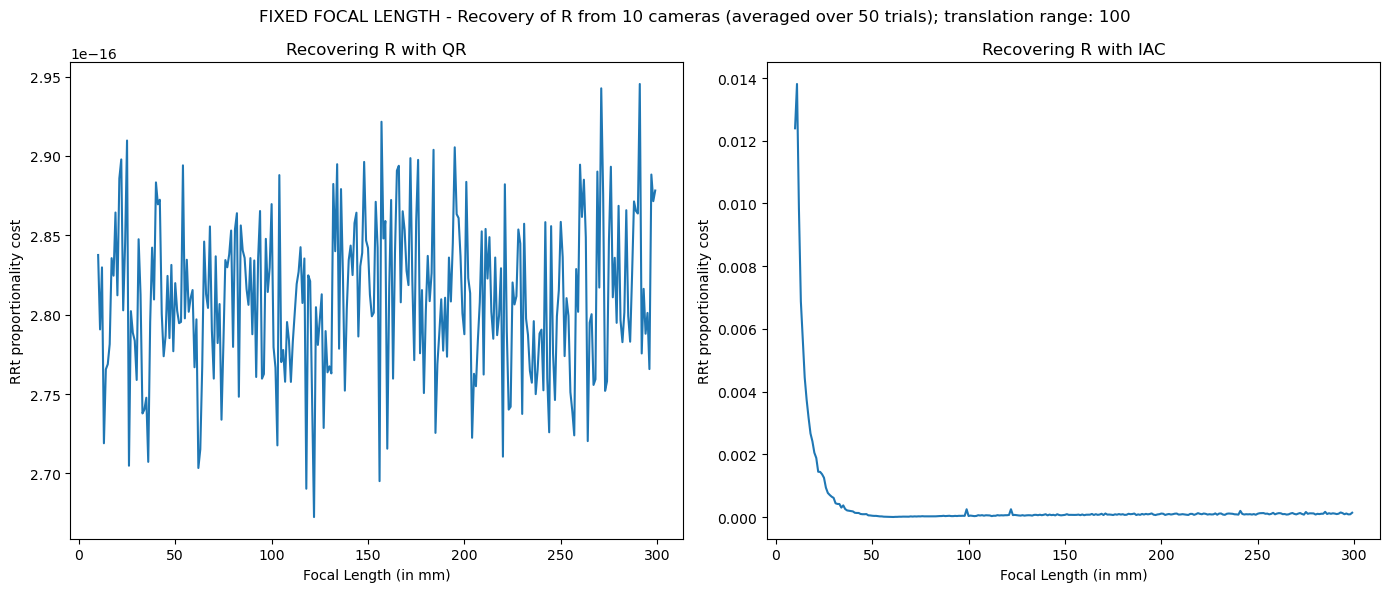

In [11]:
RRt_Error(10, 50, 1, ylim=None)
RRt_Error(10, 50, 100, ylim=None)

In [ ]:
def effect_of_translation_range_FIXEDFOCALLENGTH(num_reconstructions, focal_length, y_lim=None):
    path_10 = f"Effect_of_translation_range_10Cams_{num_reconstructions}Reconstr_{focal_length}FocalLength_2004paper.txt"
    path_50 = f"Effect_of_translation_range_50Cams_{num_reconstructions}Reconstr_{focal_length}FocalLength_2004paper.txt"
    full_path_10 = os.path.join(base_path, path_10)
    full_path_50 = os.path.join(base_path, path_50)
    df_10 = pd.read_csv(full_path_10, sep=r'\s+')
    df_50 = pd.read_csv(full_path_50, sep=r'\s+')

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].plot(df_10['TranslationRange'], df_10['QR_Kcost'], label='QR K cost')
    axes[0].plot(df_10['TranslationRange'], df_10['IAC_Kcost'], label='IAC K cost')
    axes[0].plot(df_10['TranslationRange'], df_10['maxQR_Kcost'], label='max QR K cost')
    axes[0].plot(df_10['TranslationRange'], df_10['maxIAC_Kcost'], label='max IAC K cost')
    axes[0].set_xlabel('Translation_range (in mm)')
    axes[0].set_ylabel('QR K cost (in mm)')
    axes[0].set_title('QR K cost')
    axes[0].set_xscale('log')
    axes[0].legend()
    axes[0].set_title('10 cameras')

    axes[1].plot(df_50['TranslationRange'], df_50['QR_Kcost'], label='QR K cost')
    axes[1].plot(df_50['TranslationRange'], df_50['IAC_Kcost'], label='IAC K cost')
    axes[1].plot(df_50['TranslationRange'], df_50['maxQR_Kcost'], label='max QR K cost')
    axes[1].plot(df_50['TranslationRange'], df_50['maxIAC_Kcost'], label='max IAC K cost')
    axes[1].set_xlabel('Translation_range (in mm)')
    axes[1].set_ylabel('IAC K cost (in mm)')
    axes[1].set_title('IAC K cost')
    axes[1].set_xscale('log')
    axes[1].legend()
    axes[1].set_title('50 cameras')
    if (y_lim is not None):
        axes[0].set_ylim(0, y_lim)
        axes[1].set_ylim(0, y_lim)

    plt.suptitle(f"FIXED INTRINSICS - Effect of translation range on K recovery (averaged over {num_reconstructions} trials); focal length: {focal_length} mm")
    plt.tight_layout()
    plt.show()

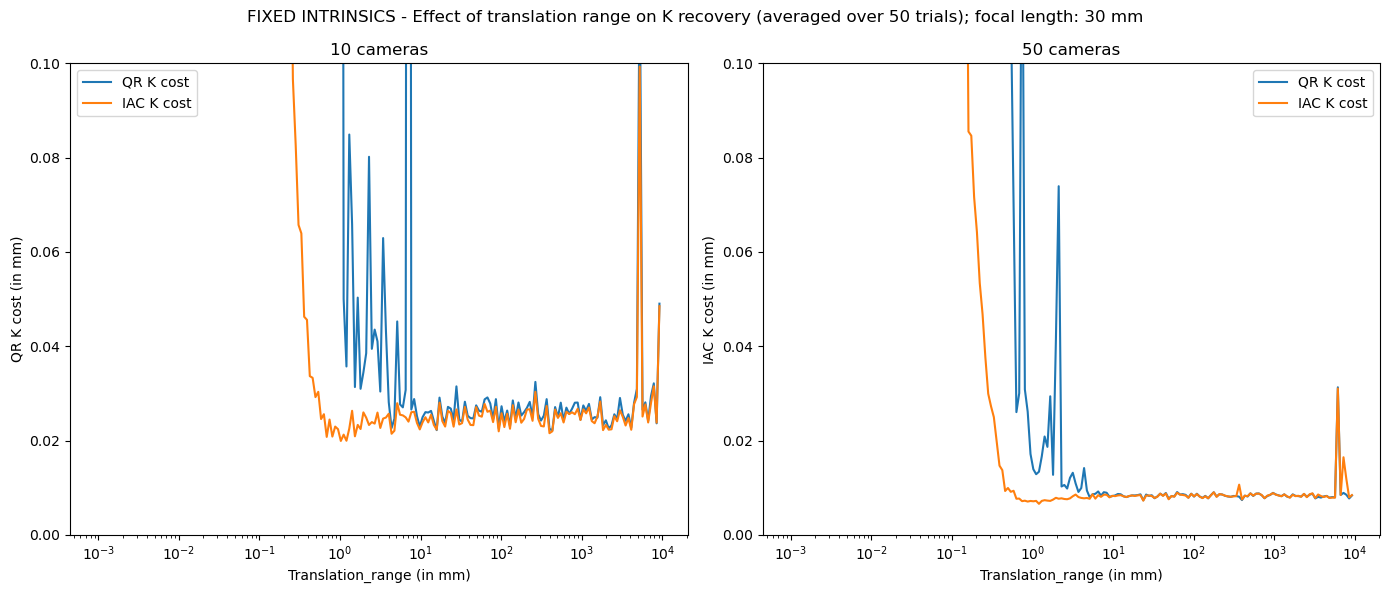

In [22]:
effect_of_translation_range_FIXEDFOCALLENGTH(50, 30, y_lim=0.1)

In [ ]:
def effect_of_translation_range_VARYINGFOCALLENGTH(num_reconstructions, center, stddev, y_lim=None):
    path_10 = f"Effect_of_translation_range_varying_10Cams_{num_reconstructions}Reconstr_CamDistLogN({center},{stddev}).txt"
    path_50 = f"Effect_of_translation_range_varying_50Cams_{num_reconstructions}Reconstr_CamDistLogN({center},{stddev}).txt"
    full_path_10 = os.path.join(base_path, path_10)
    full_path_50 = os.path.join(base_path, path_50)
    df_10 = pd.read_csv(full_path_10, sep=r'\s+')
    df_50 = pd.read_csv(full_path_50, sep=r'\s+')

    averaged_df_10 = df_10.groupby('TranslationRange', as _index=False).mean()
    averaged_df_50 = df_50.groupby('TranslationRange', as _index=False).

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].plot(averaged_df_10['TranslationRange'], averaged_df_10['QR_Kcost'], label='QR K cost')
    axes[0].plot(averaged_df_10['TranslationRange'], averaged_df_10['IAC_Kcost'], label='IAC K cost')
    axes[0].set_xlabel('Translation_range (in mm)')
    axes[0].set_ylabel('QR K cost (in mm)')
    axes[0].set_title('QR K cost')
    axes[0].set_xscale('log')
    axes[0].legend()
    axes[0].set_title('10 cameras')

    axes[1].plot(averaged_df_50['TranslationRange'], averaged_df_50['QR_Kcost'], label='IAC K cost')
    axes[1].plot(averaged_df_50['TranslationRange'], averaged_df_50['IAC_Kcost'], label='IAC K cost')
    axes[1].set_xlabel('Translation_range (in mm)')
    axes[1].set_ylabel('IAC K cost (in mm)')
    axes[1].set_title('IAC K cost')
    axes[1].set_xscale('log')
    axes[1].legend()
    axes[1].set_title('50 cameras')
    if (y_lim is not None):
        axes[0].set_ylim(0, y_lim)
        axes[1].set_ylim(0, y_lim)

    plt.suptitle(f"VARYING INTRINSICS - Effect of translation range on K recovery (averaged over {num_reconstructions} trials)")
    plt.tight_layout()
    plt.show()

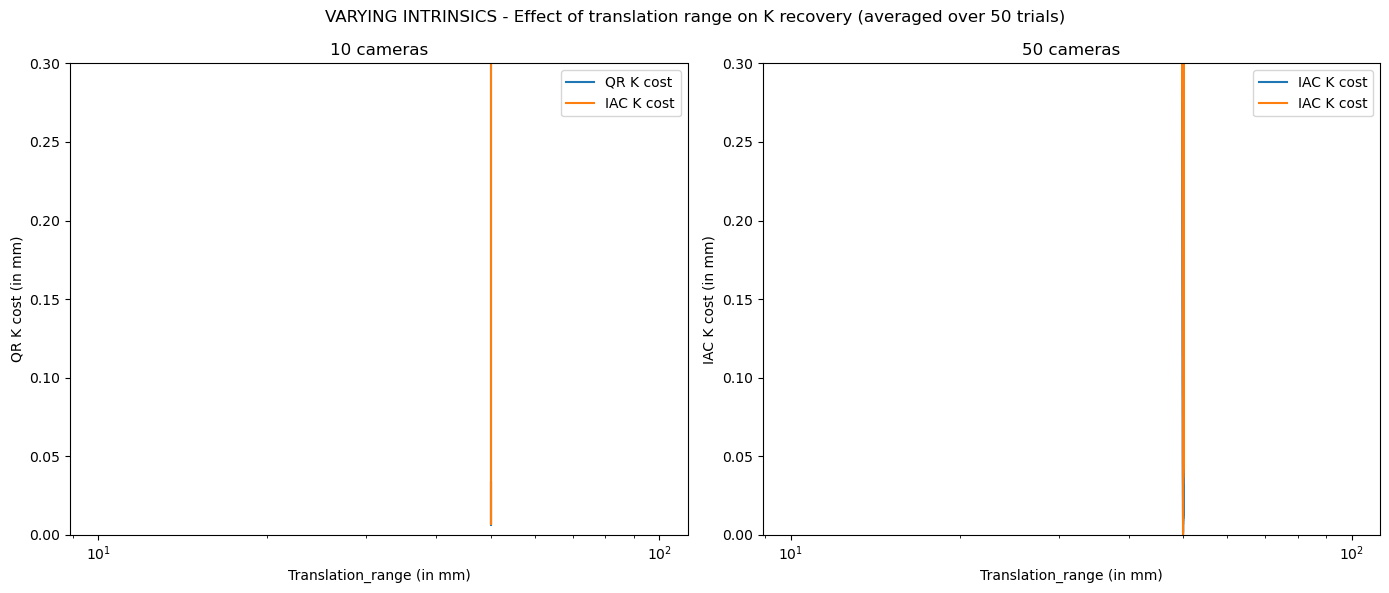

In [21]:
effect_of_translation_range_VARYINGFOCALLENGTH(50, 3.7, 0.6, y_lim=0.3)